## Deep Learning From Scratch
### Building with Python from First Principles
#### Seth Weidman
https://github.com/SethHWeidman/DLFS_code

In [2]:
# numpy
import numpy as np
from numpy import ndarray

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from typing import Callable
from typing import List

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a + b

array([5, 7, 9])

In [3]:
a * b

array([ 4, 10, 18])

In [4]:
c = np.array([[1, 2], [3, 4]])
print(c.sum(axis=0))
print(c.sum(axis=1))

[4 6]
[3 7]


In [5]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element of ndarray
    '''
    return np.maximum(0.2 * x, x)

leaky_relu(c)

array([[1., 2.],
       [3., 4.]])

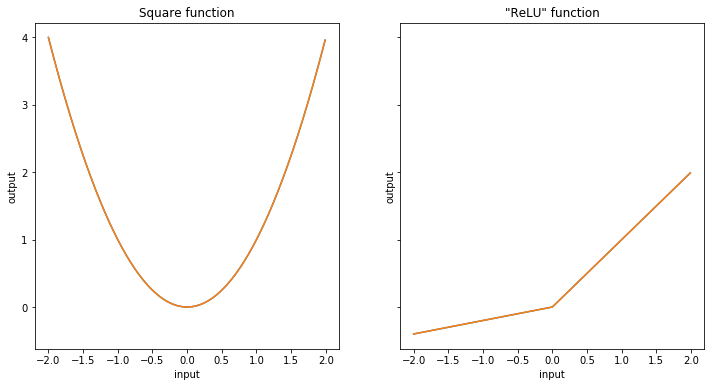

In [6]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output');
# plt.savefig(IMG_FOLDER_PATH + "01_two_functions.png")
# plt.savefig(PDF_IMG_FOLDER_PATH + "01_two_functions.pdf")

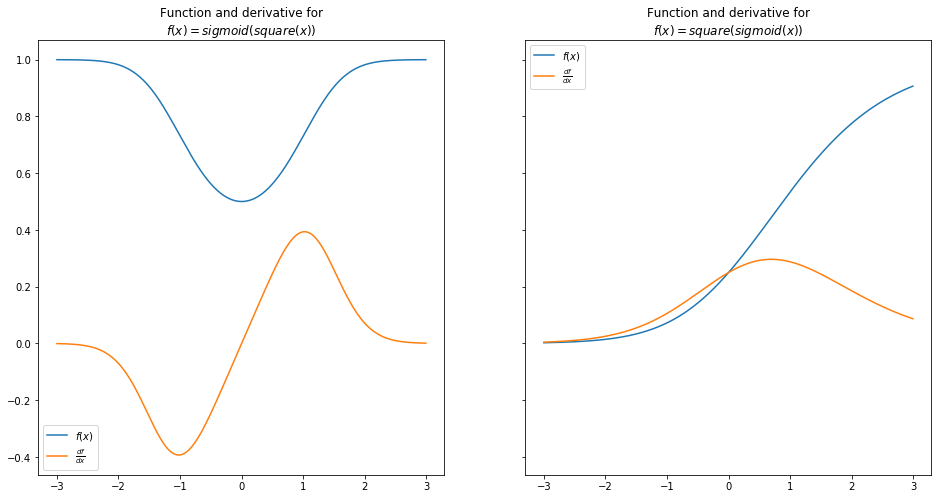

In [11]:
import numpy as np
from numpy import ndarray

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from typing import Callable
from typing import List

# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]

def deriv(func: Callable[[ndarray], ndarray]
          , input_arr: ndarray
          , delta: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_arr" array.
    '''
    return (func(input_arr + delta) - func(input_arr - delta)) / (2 * delta)

def chain_length_2(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''
    assert len(chain) == 2, \
    "Length of input 'chain' should be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))


def square(x: ndarray) -> ndarray:
    return np.power(x, 2)

def sigmoid(x: ndarray) ->ndarray:
    return 1 / (1 + np.exp(-x))

def chain_deriv_2(chain: Chain, input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return df1dx * df2du    


def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - 
    Across the input_range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)
    

def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of a function consisting of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)
    
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

# plt.savefig(IMG_FOLDER_PATH + "08_plot_chain_rule_1.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "08_plot_chain_rule_1.pdf");    
    
    


## Chain of length 3

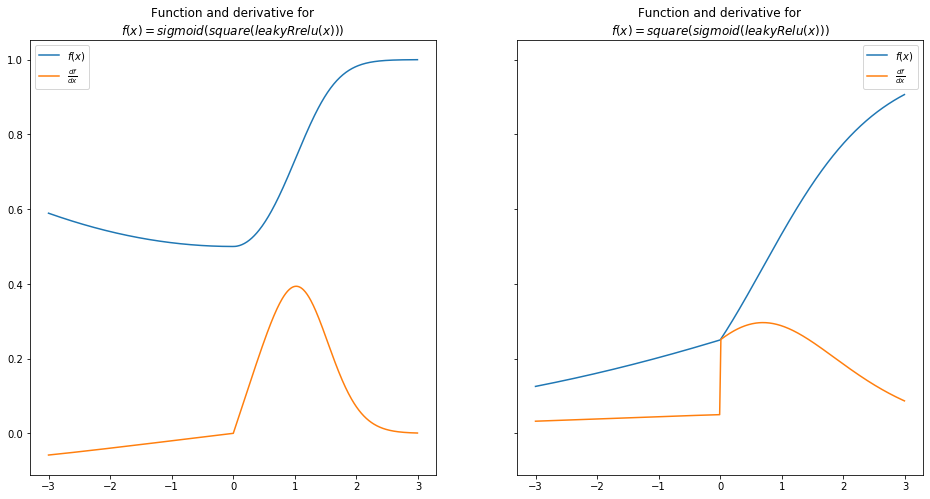

In [13]:
def chain_length_3(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates three functions in a row, in a "Chain".
    '''
    assert len(chain) == 3, \
    "Length of input 'chain' should be 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x)))

def my_chain_length_3(chain: Chain, x: ndarray) -> ndarray:
    assert len(chain) == 3, \
    "Length of input 'chain' should be 3"
    f1 = chain[0]
    f2 = chain[1:]
    return chain_length_2([f1, f2], x)

def chain_deriv_3(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(input_range)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # df3du
    df3du = deriv(f3, f2_of_x)

    # df2du
    df2du = deriv(f2, f1_of_x)

    # df1dx
    df1dx = deriv(f1, input_range)

    # Multiplying these quantities together at each point
    return df1dx * df2du * df3du


def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray,
               length: int=2) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - across one range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

    
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray,
                     length: int=2) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''

    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)

    
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRrelu(x)))$")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leakyRelu(x)))$");

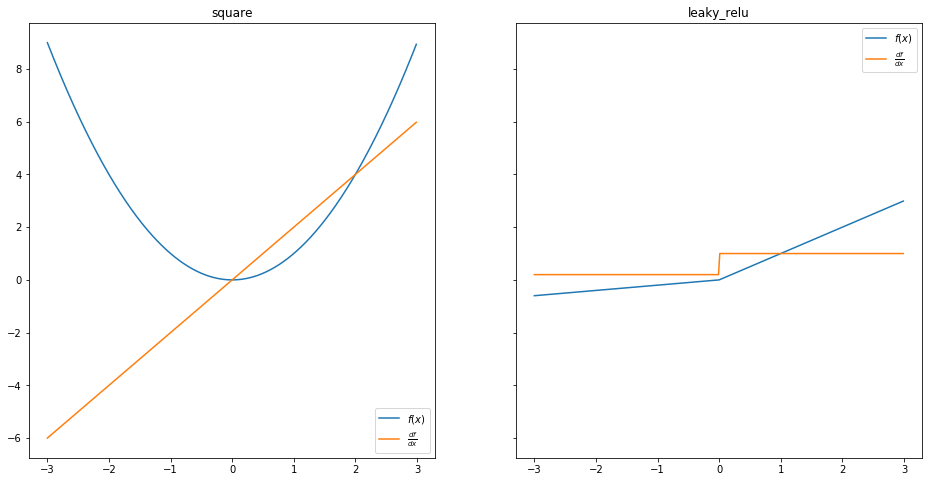

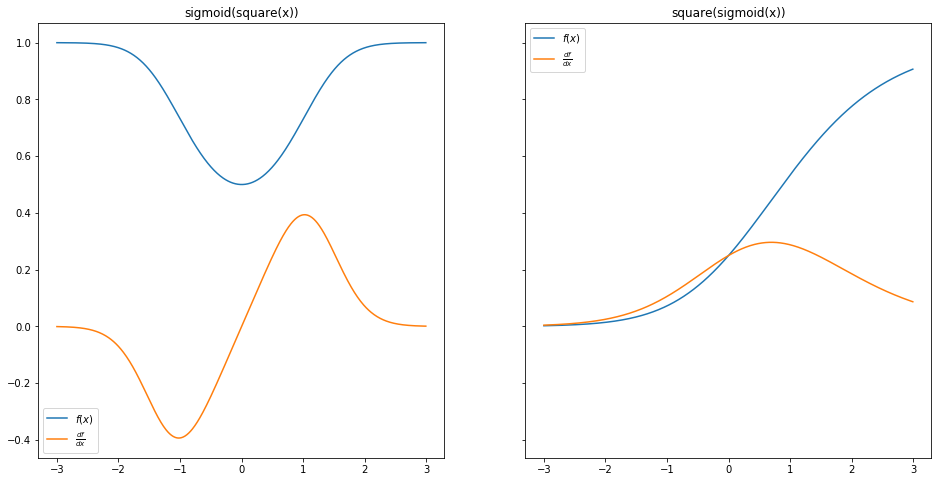

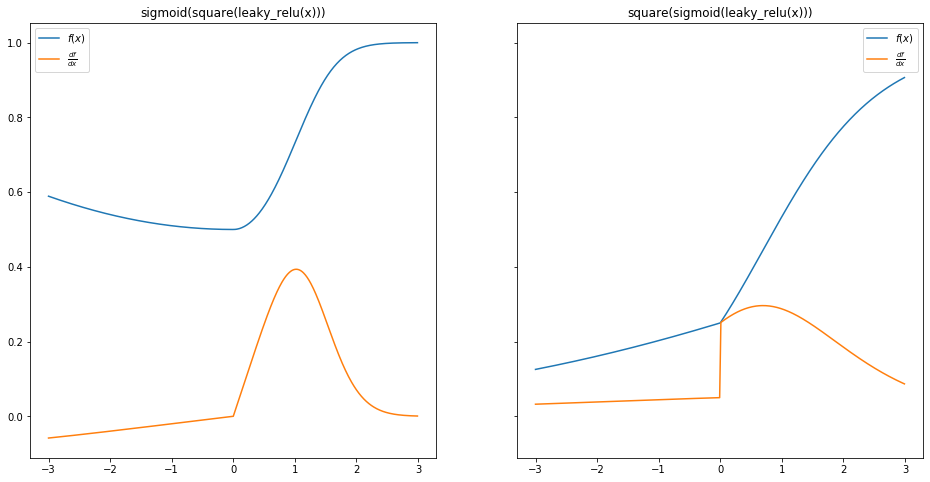

In [68]:
import numpy as np
from numpy import ndarray

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from typing import Callable
from typing import List

# A Function takes in an ndarray as an argument and produces an ndarray
ArrayFunction = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[ArrayFunction]


def square(x: ndarray) -> ndarray:
    return np.power(x, 2)

def sigmoid(x: ndarray) ->ndarray:
    return 1 / (1 + np.exp(-x))

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)


def get_deriv(func: ArrayFunction
          , delta: float = 0.001) -> ArrayFunction:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_arr" array.
    '''
    return lambda input_arr: (func(input_arr + delta) - func(input_arr - delta)) / (2 * delta)

def plot_array_function(ax, func: ArrayFunction, input_range: ndarray) -> None:
    '''
    Plots a function (ndarray -> ndarray mappings) 
    Across the input_range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, "Function requires a 1 dimensional ndarray as input_range"

    output_range = func(input_range)
    ax.plot(input_range, output_range)
    


def make_chain(chain: [ArrayFunction]) -> ArrayFunction :
    res = None
    if len(chain) == 1:
        res = chain[0]
    else:
        # f1(f2(x))
        res = lambda x: chain[0](make_chain(chain[1:])(x))
    return res

def draw_funcs_and_deriv(funcs: [ArrayFunction], input_range: ndarray, titles: [str]) -> None:
    # TODO assert for len() = 2
    common_legend = ["$f(x)$", "$\\frac{df}{dx}$"]
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col
    for idx in [0,1]:
        plot_array_function(ax[idx], funcs[idx], input_range)
        plot_array_function(ax[idx], get_deriv(funcs[idx]), input_range)
        ax[idx].legend(common_legend)
        ax[idx].set_title(titles[idx])


PLOT_RANGE = np.arange(-3, 3, 0.01)
# Simple functions
draw_funcs_and_deriv([square, leaky_relu], PLOT_RANGE, ["square", "leaky_relu"])
# Chain of 2
draw_funcs_and_deriv([
                       make_chain([sigmoid, square])
                       , make_chain([square, sigmoid])
                       ]
                     , PLOT_RANGE
                     , [
                         "sigmoid(square(x))"
                        , "square(sigmoid(x))"
                     ])
# Chain of 3
draw_funcs_and_deriv([
                       make_chain([sigmoid, square, leaky_relu])
                       , make_chain([square, sigmoid, leaky_relu])
                       ]
                     , PLOT_RANGE
                     , [
                        "sigmoid(square(leaky_relu(x)))"
                        , "square(sigmoid(leaky_relu(x)))"
                     ])


